# Physics Data Explorer – CERN Open Data

In this notebook I explore real collision data from the CMS experiment at CERN,  
using the public dataset **Dimuon_DoubleMu.csv** from the CERN Open Data portal.

I use:
- **NumPy** for numerical work,
- **pandas** for tables,
- **Matplotlib / Seaborn** for visualization.

Goals:
1. Load and inspect the CMS dimuon dataset.
2. Clean the data and compute summary statistics for muon energy and momentum.
3. Visualize the physics with histograms, line plots, and scatter plots.
4. Explain in simple words what the plots mean.

In [1]:
# Lets import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# lets make the plots look nice
sns.set_theme(style="whitegrid", context="talk") # we need to see it a bit bigger brothaaa

# lets make numbers and tables show nicely
pd.set_option("display.precision", 3) #3 decimal is ok ig.

print("Libraries loaded.")


Libraries loaded.


## 1. Load CMS dimuon dataset

The dataset `Dimuon_DoubleMu.csv` comes from the CMS experiment at CERN.
Each row is one event with two muons (muon 1 and muon 2), with columns like:

- `E1`, `E2` – energy of muon 1 and 2  
- `pt1`, `pt2` – transverse momentum of muon 1 and 2  
- `M` – invariant mass of the muon pair  

First I load the data into a pandas DataFrame and look at the basic structure.


In [2]:
#lets give the url ink ...

url = "https://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv"

data = pd.read_csv(url)

print("Shape (rows, columns):", data.shape)
data.head() #lets check my dataset loaded or not.

Shape (rows, columns): (100000, 21)


,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.699,-9.510,0.366,1.863,9.518,0.195,3.103,...,G,9.763,7.328,-1.152,6.347,7.418,0.776,-0.156,1,17.492
1,165617,75100943,G,6.204,-4.267,0.457,-4.479,4.291,-0.912,3.035,...,G,9.669,7.274,-2.821,-5.710,7.802,-0.679,-0.370,1,11.553
2,165617,75587682,G,19.289,-4.212,-0.652,18.812,4.262,2.191,-2.988,...,G,9.824,4.344,-0.473,8.799,4.370,1.450,-0.109,1,9.164
3,165617,75660978,G,7.043,-6.327,-0.269,3.080,6.332,0.469,-3.099,...,G,5.586,4.475,0.849,-3.232,4.555,-0.660,0.188,1,12.477
4,165617,75947690,G,7.275,0.103,-5.533,-4.721,5.534,-0.774,-1.552,...,G,7.318,-0.399,6.941,2.283,6.952,0.323,1.628,1,14.316


In [3]:
##hmmm...a bit inspect more hehe :)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   type1   100000 non-null  object 
 3   E1      100000 non-null  float64
 4   px1     100000 non-null  float64
 5   py1     100000 non-null  float64
 6   pz1     100000 non-null  float64
 7   pt1     100000 non-null  float64
 8   eta1    100000 non-null  float64
 9   phi1    100000 non-null  float64
 10  Q1      100000 non-null  int64  
 11  type2   100000 non-null  object 
 12  E2      100000 non-null  float64
 13  px2     100000 non-null  float64
 14  py2     100000 non-null  float64
 15  pz2     100000 non-null  float64
 16  pt2     100000 non-null  float64
 17  eta2    100000 non-null  float64
 18  phi2    100000 non-null  float64
 19  Q2      100000 non-null  int64  
 20  M       100000 non-null  float64
dtypes: float64(

## 2. Data cleaning

Real detector data can contain missing values or unphysical entries.
To keep things simple, I apply a few basic quality cuts:

- Drop rows with any missing values.
- Require positive energy and transverse momentum for both muons.

The cleaned DataFrame will be called `clean`.


In [4]:
# cleaning flaws data if there is any!!!

clean = data.dropna()

clean = clean[
    (clean["E1"] > 0) &
    (clean["E2"] > 0) &
    (clean["pt1"] > 0) &
    (clean["pt2"] > 0)
]

print("Original number of events::", len(data))
print("After cleaning :", len(clean))

clean.head()


Original events: 100000
After cleaning : 100000


,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.699,-9.510,0.366,1.863,9.518,0.195,3.103,...,G,9.763,7.328,-1.152,6.347,7.418,0.776,-0.156,1,17.492
1,165617,75100943,G,6.204,-4.267,0.457,-4.479,4.291,-0.912,3.035,...,G,9.669,7.274,-2.821,-5.710,7.802,-0.679,-0.370,1,11.553
2,165617,75587682,G,19.289,-4.212,-0.652,18.812,4.262,2.191,-2.988,...,G,9.824,4.344,-0.473,8.799,4.370,1.450,-0.109,1,9.164
3,165617,75660978,G,7.043,-6.327,-0.269,3.080,6.332,0.469,-3.099,...,G,5.586,4.475,0.849,-3.232,4.555,-0.660,0.188,1,12.477
4,165617,75947690,G,7.275,0.103,-5.533,-4.721,5.534,-0.774,-1.552,...,G,7.318,-0.399,6.941,2.283,6.952,0.323,1.628,1,14.316


In [15]:
# quick check
clean[["E1", "E2", "pt1", "pt2", "M"]].describe()


,E1,E2,pt1,pt2,M
count,100000.000,100000.000,100000.000,100000.000,100000.000
mean,20.414,14.782,10.072,10.008,17.691
std,36.874,17.757,9.974,10.131,20.952
min,2.711,2.634,0.266,0.683,0.300
25%,8.777,6.669,5.019,4.932,4.492
50%,13.017,9.505,6.944,6.864,12.411
75%,21.071,15.749,10.440,10.375,19.423
max,8684.880,1604.970,366.499,528.434,299.202


## 3. Summary statistics for key columns

Now I look at simple statistics (mean, median, standard deviation) for:
- energies `E1`, `E2`
- transverse momenta `pt1`, `pt2`
- dimuon invariant mass `M`

This gives a feeling for the typical energy/momentum scales in the sample.


In [5]:
#ok ladis and gentleman,now its time  to see some stats!!

energy_cols = ["E1", "E2"]
momentum_cols = ["pt1", "pt2"]
mass_col = "M"

print("Energy columns:", energy_cols)
print("Momentum columns:", momentum_cols)
print()

energy_stats = clean[energy_cols].agg(["mean", "median", "std"])
momentum_stats = clean[momentum_cols].agg(["mean", "median", "std"])
mass_stats = clean[[mass_col]].agg(["mean", "median", "std"])

print("Energy stats:")
display(energy_stats)

print("\nMomentum stats:")
display(momentum_stats)

print("\nMass stats:")
display(mass_stats)

Energy columns: ['E1', 'E2']
Momentum columns: ['pt1', 'pt2']

Energy stats:


,E1,E2
mean,20.414,14.782
median,13.017,9.505
std,36.874,17.757



Momentum stats:


,pt1,pt2
mean,10.072,10.008
median,6.944,6.864
std,9.974,10.131



Mass stats:


,M
mean,17.691
median,12.411
std,20.952


## 4. Histograms of energies, momenta, and mass

Here I use histograms to see how the values are distributed:

- Compare the energy of muon 1 and muon 2.
- Compare the transverse momentum `pt1` and `pt2`.
- Look at the invariant mass `M` of the muon pair.


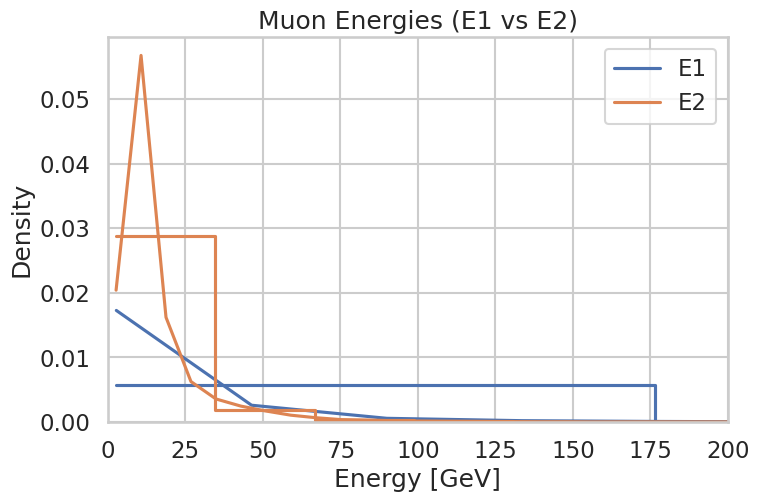

In [13]:
# drawing time guys!!
# E1 VS E2.

plt.figure(figsize=(8, 5))

sns.histplot(clean["E1"], bins=50, kde=True,
             label="E1", stat="density", element="step", fill=False)
sns.histplot(clean["E2"], bins=50, kde=True,
             label="E2", stat="density", element="step", fill=False)
plt.xlim(0, 200)

plt.title("Muon Energies (E1 vs E2)")
plt.xlabel("Energy [GeV]")
plt.ylabel("Density")
plt.legend()
plt.show()


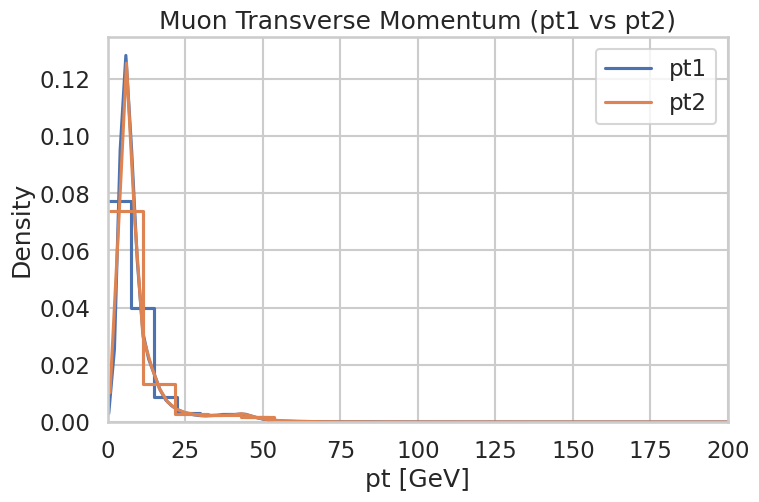

In [14]:
# PT1 VS PT2

plt.figure(figsize=(8, 5))

sns.histplot(clean["pt1"], bins=50, kde=True,
             label="pt1", stat="density", element="step", fill=False)
sns.histplot(clean["pt2"], bins=50, kde=True,
             label="pt2", stat="density", element="step", fill=False)

plt.xlim(0, 200)

plt.title("Muon Transverse Momentum (pt1 vs pt2)")
plt.xlabel("pt [GeV]")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
#invariant mass

plt.figure(figsize=(8, 5))

sns.histplot(clean["M"], bins=60, kde=False)

plt.title("Dimuon Invariant Mass (M)")
plt.xlabel("M [GeV]")
plt.ylabel("Number of events")
plt.show()


### Interpretation

- The **energy** and **pt** distributions of muon 1 and 2 are similar, as expected
  for a symmetric dimuon selection.
- The **invariant mass** histogram shows how often different dimuon masses occur.
  A visible bump or peak around ~90 GeV is consistent with the **Z boson**
  decaying to a muon pair (Z → μ⁺μ⁻) in this dataset.

## 5. Line plot: running average of dimuon mass

To use NumPy in a simple way, I compute a running (moving) average of the
invariant mass `M` over the events, and plot it as a line.

This is not a serious physics analysis, but it demonstrates:
- turning a pandas column into a NumPy array,
- smoothing it with a moving average,
- and plotting the result as a line plot.


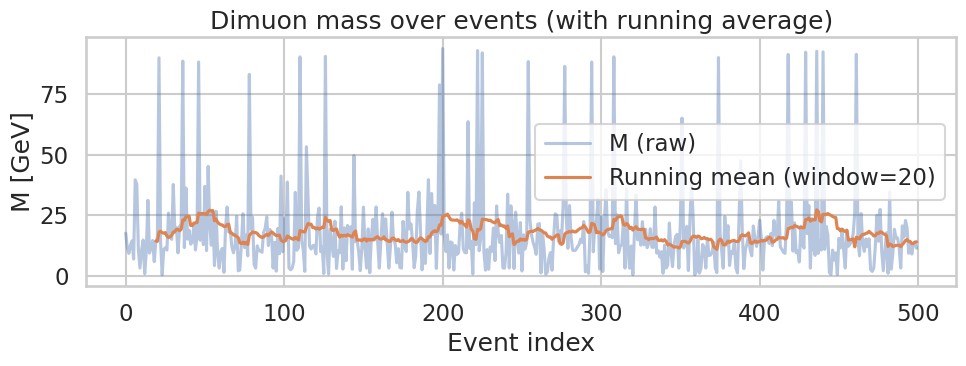

In [8]:

#LETS DO SOME NUMPY
# UMMMMM we should take the first N events to keep the line readable
N = 500
m_vals = clean["M"].to_numpy()[:N]

# this is simple moving average using convolution
window = 20
kernel = np.ones(window) / window
running_mean = np.convolve(m_vals, kernel, mode="valid")

plt.figure(figsize=(10, 4))
plt.plot(m_vals, label="M (raw)", alpha=0.4)
plt.plot(np.arange(window-1, N), running_mean, label=f"Running mean (window={window})")
plt.xlabel("Event index")
plt.ylabel("M [GeV]")
plt.title("Dimuon mass over events (with running average)")
plt.legend()
plt.tight_layout()
plt.show()


## 6. Scatter plots: energy vs transverse momentum

Now I visualize the relationship between the energy `E` and transverse momentum `pt`
for each muon using scatter plots.
Each point is one event.


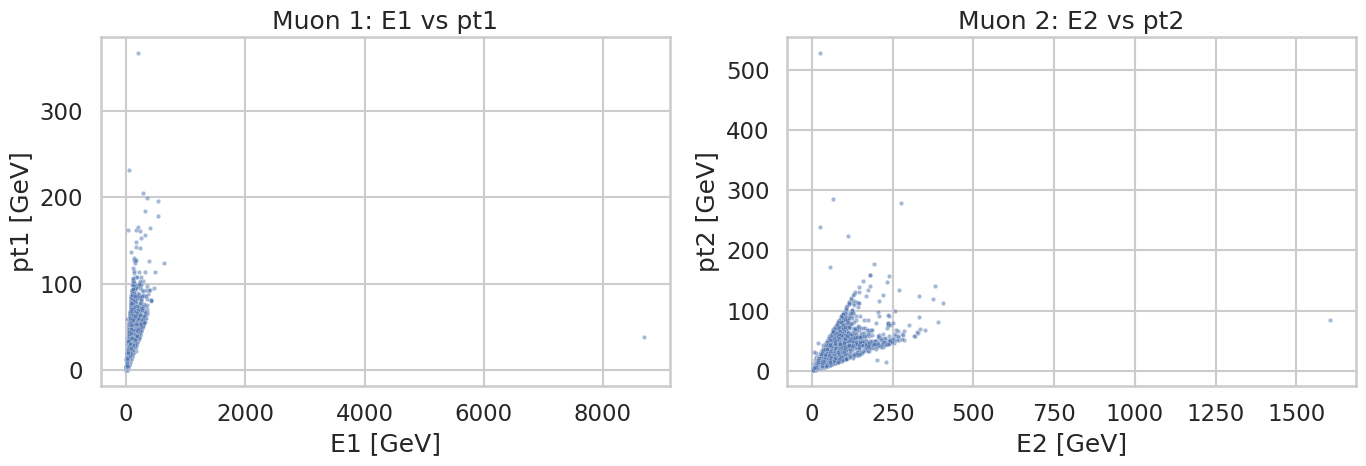

In [9]:
#Muon 1 and Muon 2 side-by-side. clash of rivals!!!!!!

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x=clean["E1"], y=clean["pt1"], s=10, alpha=0.5, ax=axes[0])
axes[0].set_title("Muon 1: E1 vs pt1")
axes[0].set_xlabel("E1 [GeV]")
axes[0].set_ylabel("pt1 [GeV]")

sns.scatterplot(x=clean["E2"], y=clean["pt2"], s=10, alpha=0.5, ax=axes[1])
axes[1].set_title("Muon 2: E2 vs pt2")
axes[1].set_xlabel("E2 [GeV]")
axes[1].set_ylabel("pt2 [GeV]")

plt.tight_layout()
plt.show()


##Everything is squished. Lets Zoom in....

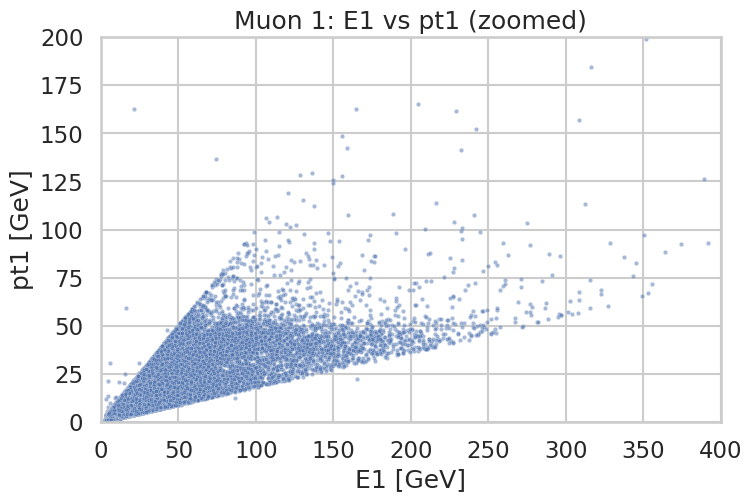

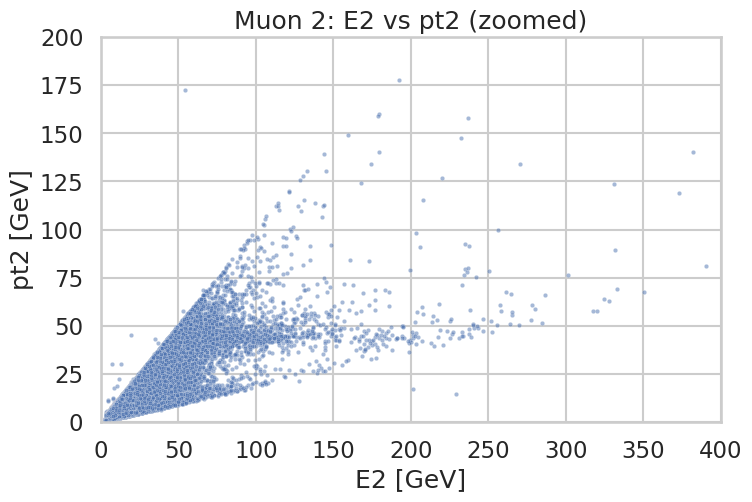

In [11]:
## here we go....

plt.figure(figsize=(8, 5))
sns.scatterplot(x=clean["E1"], y=clean["pt1"], s=10, alpha=0.5)
plt.xlim(0, 400)
plt.ylim(0, 200)
plt.title("Muon 1: E1 vs pt1 (zoomed)")
plt.xlabel("E1 [GeV]")
plt.ylabel("pt1 [GeV]")
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x=clean["E2"], y=clean["pt2"], s=10, alpha=0.5)
plt.xlim(0, 400)
plt.ylim(0, 200)
plt.title("Muon 2: E2 vs pt2 (zoomed)")
plt.xlabel("E2 [GeV]")
plt.ylabel("pt2 [GeV]")
plt.show()


### Interpretation

- Most events cluster in a certain band of energy and pt, showing the typical
  kinematic range of muons in this sample.
- There are a few higher-energy events, but they are rarer.
- Energy and pt are positively related: higher-energy muons tend to have higher pt.


## 7. Correlation heatmap

To see how different variables are related globally, I compute the correlation
matrix between `E1`, `E2`, `pt1`, `pt2`, and `M`, and plot it as a heatmap.

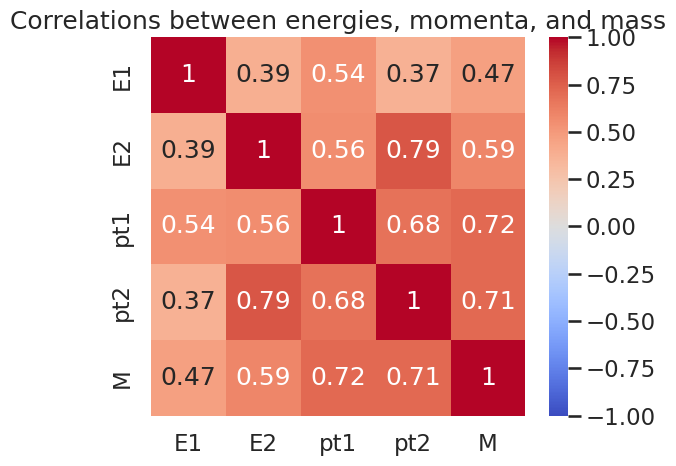

In [12]:
##co-relation time.

subset = clean[["E1", "E2", "pt1", "pt2", "M"]]
corr = subset.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlations between energies, momenta, and mass")
plt.tight_layout()
plt.show()


### Interpretation

- Positive correlations (values near +1) mean the variables tend to increase together.
- The energies and transverse momenta are moderately correlated, as expected.
- The dimuon mass `M` shows some dependence on the muon kinematics: changing the
  energies and momenta of the muons changes the invariant mass of the pair.


## 8. Comparison of different mass regions (optional)

As a simple extension, I compare the transverse momentum distribution
of muon 1 in two dimuon mass regions:

- A **low-mass** region: `M < 60 GeV`
- A **Z-peak** region: `80 GeV < M < 100 GeV`

This is a very basic way to see whether events near the Z boson mass
have different kinematics from lower-mass events.


Events with M < 60 GeV: 93793
Events with 80 < M < 100 GeV: 5174


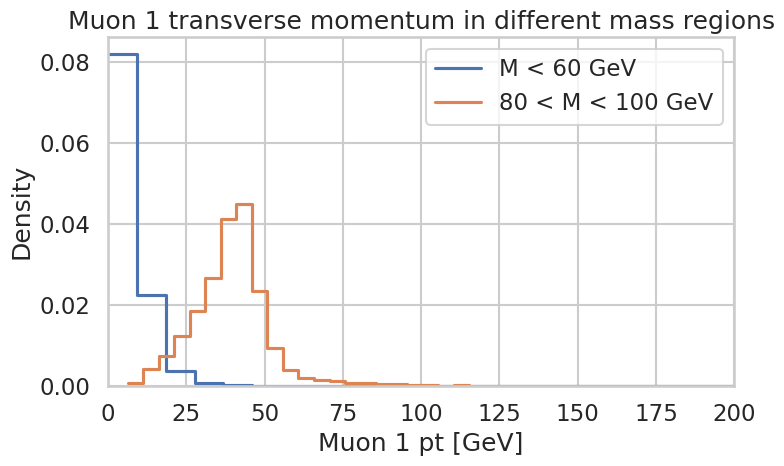

In [16]:
low_mass = clean[clean["M"] < 60]
z_peak   = clean[(clean["M"] > 80) & (clean["M"] < 100)]

print("Events with M < 60 GeV:", len(low_mass))
print("Events with 80 < M < 100 GeV:", len(z_peak))

plt.figure(figsize=(8, 5))

sns.histplot(low_mass["pt1"], bins=40, stat="density",
             element="step", fill=False, label="M < 60 GeV")
sns.histplot(z_peak["pt1"], bins=40, stat="density",
             element="step", fill=False, label="80 < M < 100 GeV")

plt.xlim(0, 200)
plt.xlabel("Muon 1 pt [GeV]")
plt.ylabel("Density")
plt.title("Muon 1 transverse momentum in different mass regions")
plt.legend()
plt.tight_layout()
plt.show()


Events in the Z-peak region tend to populate somewhat higher transverse
momentum values compared to the low-mass region. This is qualitatively
consistent with the expectation that a heavier parent particle (the
Z boson) produces muons with larger momenta.



## 9. Conclusion

In this mini-project I carried out a basic exploration of real
**CERN Open Data** from the CMS experiment, using the
`Dimuon_DoubleMu.csv` dimuon sample.

Main steps:

1. Loaded the dataset into a pandas DataFrame and inspected its structure.
2. Applied simple cleaning and quality cuts (removing missing values and
   unphysical entries).
3. Computed summary statistics for the muon energies, transverse momenta,
   and the dimuon invariant mass.
4. Used NumPy, Matplotlib, and Seaborn to produce:
   - Histograms for energies, transverse momenta, and dimuon mass,
   - A line plot of the dimuon mass with a running average,
   - Scatter plots of energy vs transverse momentum for both muons,
   - A correlation heatmap for the main kinematic variables.
5. Compared muon kinematics in different dimuon mass regions.

Even though this is a simple, introductory analysis, it shows that I can:

- Work with real high-energy physics data from the CERN Open Data portal,
- Use the standard Python data analysis stack (NumPy, pandas, Matplotlib, Seaborn),
- Produce clear visualisations,
- And interpret the main features of the plots in physical terms.

With more time, natural next steps would include:
- Fitting the dimuon mass peak to measure the Z boson mass and width,
- Estimating backgrounds and signal-to-background ratios,
- Extending the analysis to other CMS Open Data samples.